# **Import**

In [ ]:
import requests
import matplotlib.pyplot as plt
import numpy as np
import re

r = requests.get("https://justjoin.it/api/offers")
dataset = r.json()

# **Obliczenia**

In [ ]:
def make_chart(x):
    x_total_salary = 0
    x_number_jobs = 0
    x_avg_salary = 0
    x_min_salaries = []
    x_max_salaries = []

    for job in dataset:
        if job['marker_icon'] == x and job['employment_types'][0]['salary'] != None and job['employment_types'][0]['salary']["currency"] == 'pln':
            salary_info = job["employment_types"][0]["salary"]
            x_avg_salary = (salary_info["from"] + salary_info["to"]) / 2
            x_total_salary += x_avg_salary
            x_number_jobs += 1
            x_min_salary = salary_info.get("from")
            x_max_salary = salary_info.get("to")
            x_min_salaries.append(x_min_salary)
            x_max_salaries.append(x_max_salary)

    x_average_salary = x_total_salary / x_number_jobs

    x_name = x.capitalize()

    plt.figure(figsize=(20, 8))
    plt.hist(x_min_salaries, label="Minimalne zarobki", color="blue", bins = 30)
    plt.ylabel("Oferty Pracy")
    plt.xlabel("Wynagrodzenie")
    plt.title(f"Minimalne Wynagrodzenie w Ofertach Pracy {x_name}")
    plt.legend()

    plt.figure(figsize=(20, 8))
    plt.hist(x_max_salaries, label="Maksymalne zarobki", color="red", bins = 30)
    plt.ylabel("Oferty Pracy")
    plt.xlabel("Wynagrodzenie")
    plt.title(f"Maksymalne Wynagrodzenie w Ofertach Pracy {x_name}")
    plt.legend()

    plt.figure(figsize=(20, 8))
    plt.hist(x_min_salaries, label="Minimalne zarobki", color="blue", bins = 30)
    plt.hist(x_max_salaries, label="Maksymalne zarobki", color="red", alpha = 0.5, bins = 30)
    plt.ylabel("Oferty Pracy")
    plt.xlabel("Wynagrodzenie")
    plt.title(f"Wynagrodzenie w Ofertach Pracy {x_name}")
    plt.legend()


In [ ]:
def list_offers(x):
    x_total_salary = 0
    x_number_jobs = 0
    x_avg_salary = 0
    x_min_salary = float('inf')
    x_max_salary = 0
    global list_salary

    for job in dataset:
        if job['marker_icon'] == x and job['employment_types'][0]['salary'] != None and job['employment_types'][0]['salary']["currency"] == 'pln':
            salary_info = job["employment_types"][0]["salary"]
            x_avg_salary = (salary_info["from"] + salary_info["to"]) / 2
            x_total_salary += x_avg_salary
            x_number_jobs += 1

            if salary_info.get("from") < x_min_salary:
                x_min_salary = salary_info.get("from")

            if salary_info.get("to") > x_max_salary:
                x_max_salary = salary_info.get("to")

    x_list_salary = (x_min_salary, x_avg_salary, x_max_salary)
    list_salary += x_list_salary


In [ ]:
def all_list_offers():
    list_salary = []
    marker_icons = set()

    for marker_icon in dataset:
        marker_icons.add(marker_icon['marker_icon'])

    marker_icons = list(marker_icons)
    marker_icons.sort()
    marker_icons = tuple(marker_icons)

    for numbers_marker in marker_icons:
        x_total_salary = 0
        x_number_jobs = 0
        x_avg_salary = 0
        x_min_salary = float('inf')
        x_max_salary = 0
        for job in dataset:
            if job['marker_icon'] == numbers_marker and job['employment_types'][0]['salary'] != None and job['employment_types'][0]['salary']["currency"] == 'pln':
                salary_info = job["employment_types"][0]["salary"]
                x_avg_salary = (salary_info["from"] + salary_info["to"]) / 2
                x_total_salary += x_avg_salary
                x_number_jobs += 1

                if salary_info.get("from") < x_min_salary:
                    x_min_salary = salary_info.get("from")

                if salary_info.get("to") > x_max_salary:
                    x_max_salary = salary_info.get("to")

        x_list_salary = (x_min_salary, x_avg_salary, x_max_salary)
        list_salary += x_list_salary

    colors = ["#4097ed", "#0080ff", "#0059d6", "#e84a4a", "#ff0000", "#ab0000", "#e8e84a", "#ffff00", "#a3a300", "#49f279", "#00ff48", "#00962b"]
    plt.figure(figsize=(20, 8))
    plt.xlabel(marker_icons)
    plt.bar(range(len(list_salary)), list_salary, color = colors)
    plt.ylabel("Wynagrodzenie")
    plt.title("Wynagrodzenie w Ofertach Pracy IT")
    plt.legend()

# **Wykresy**

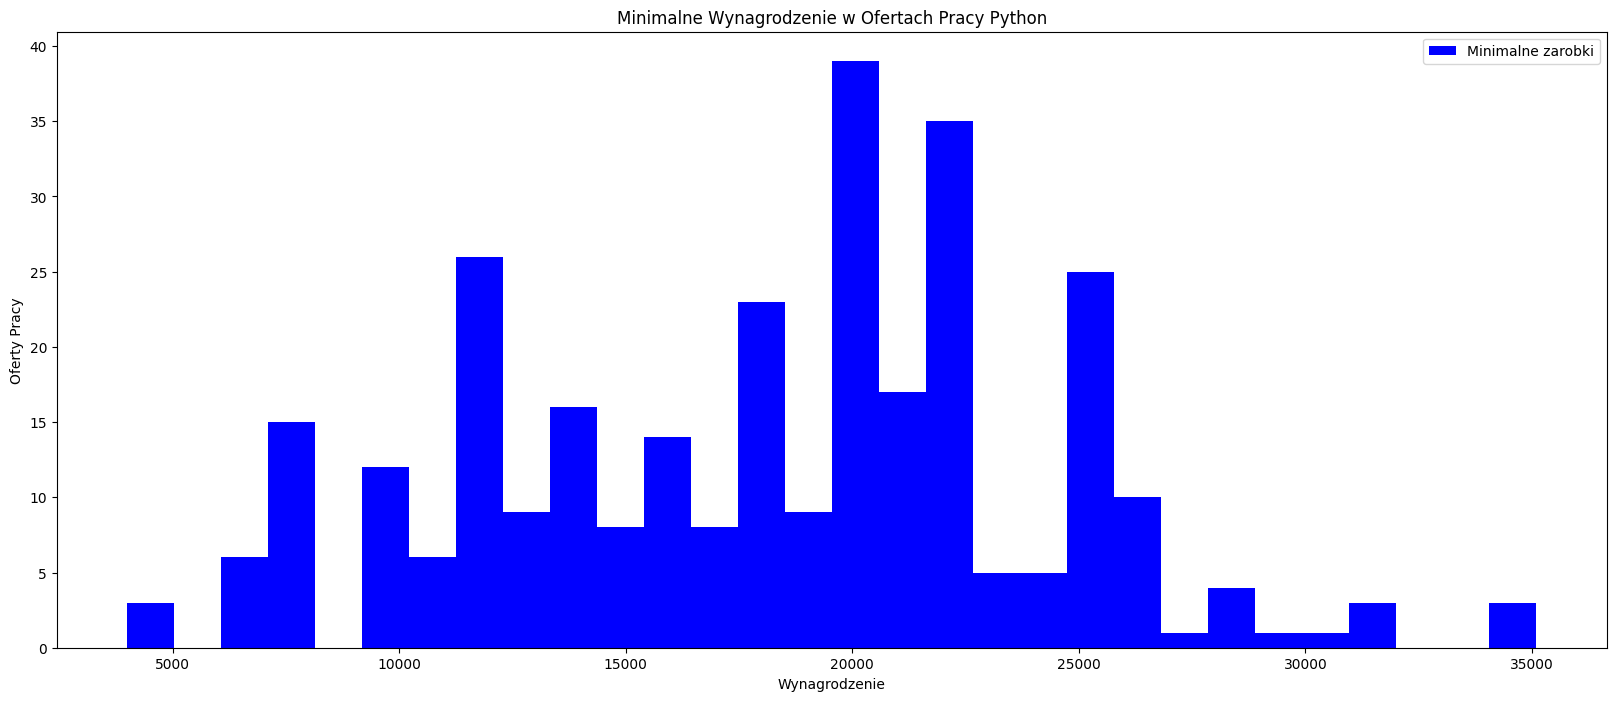

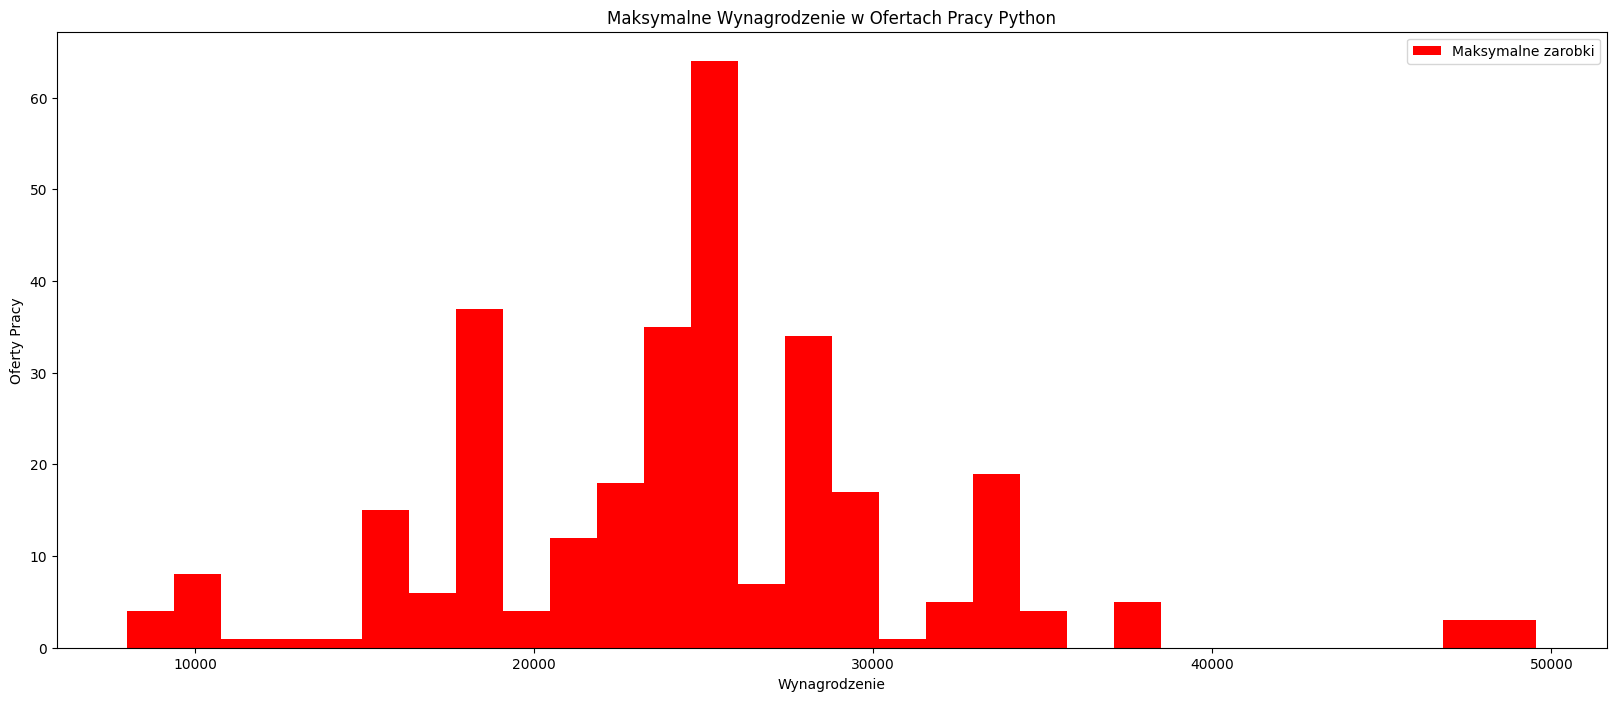

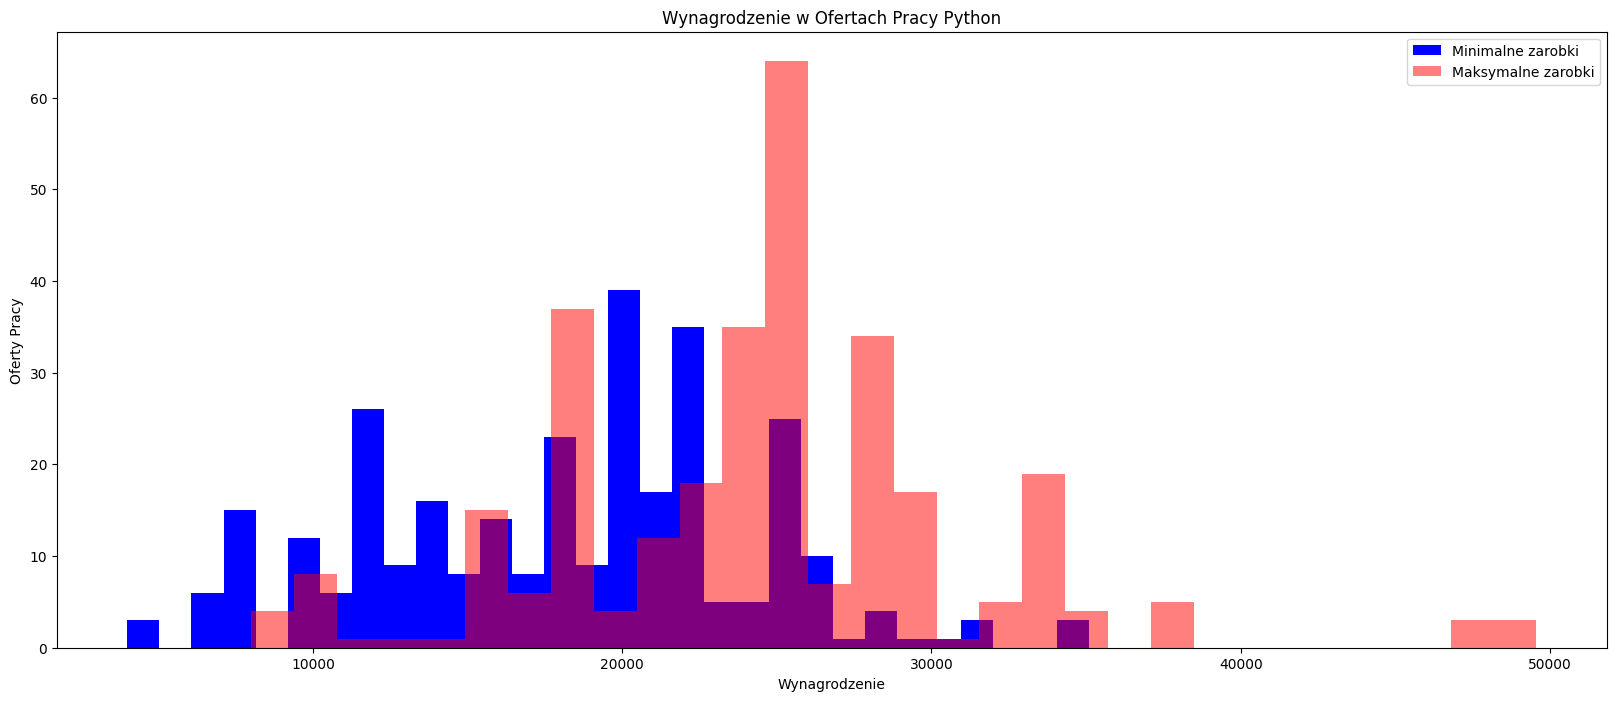

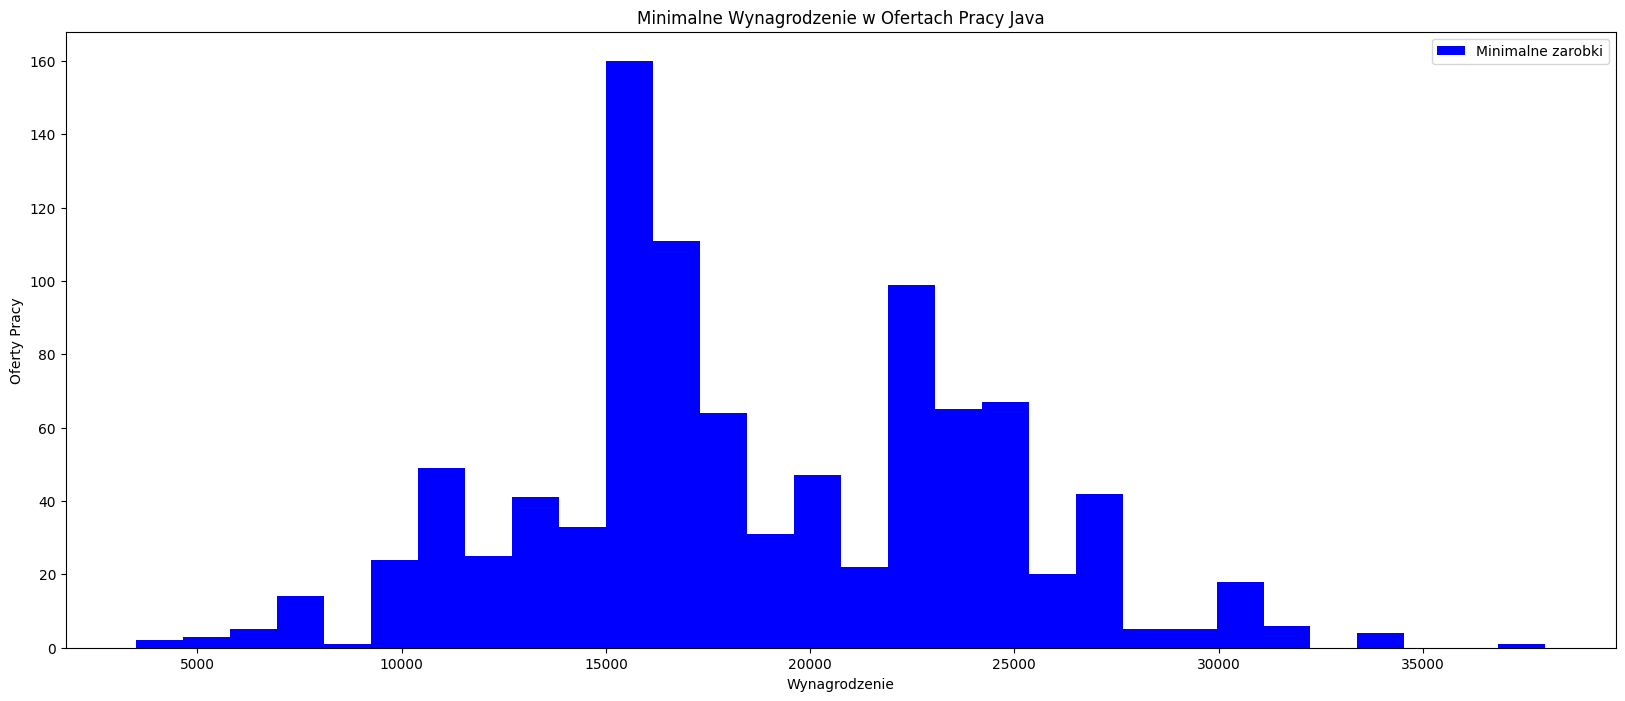

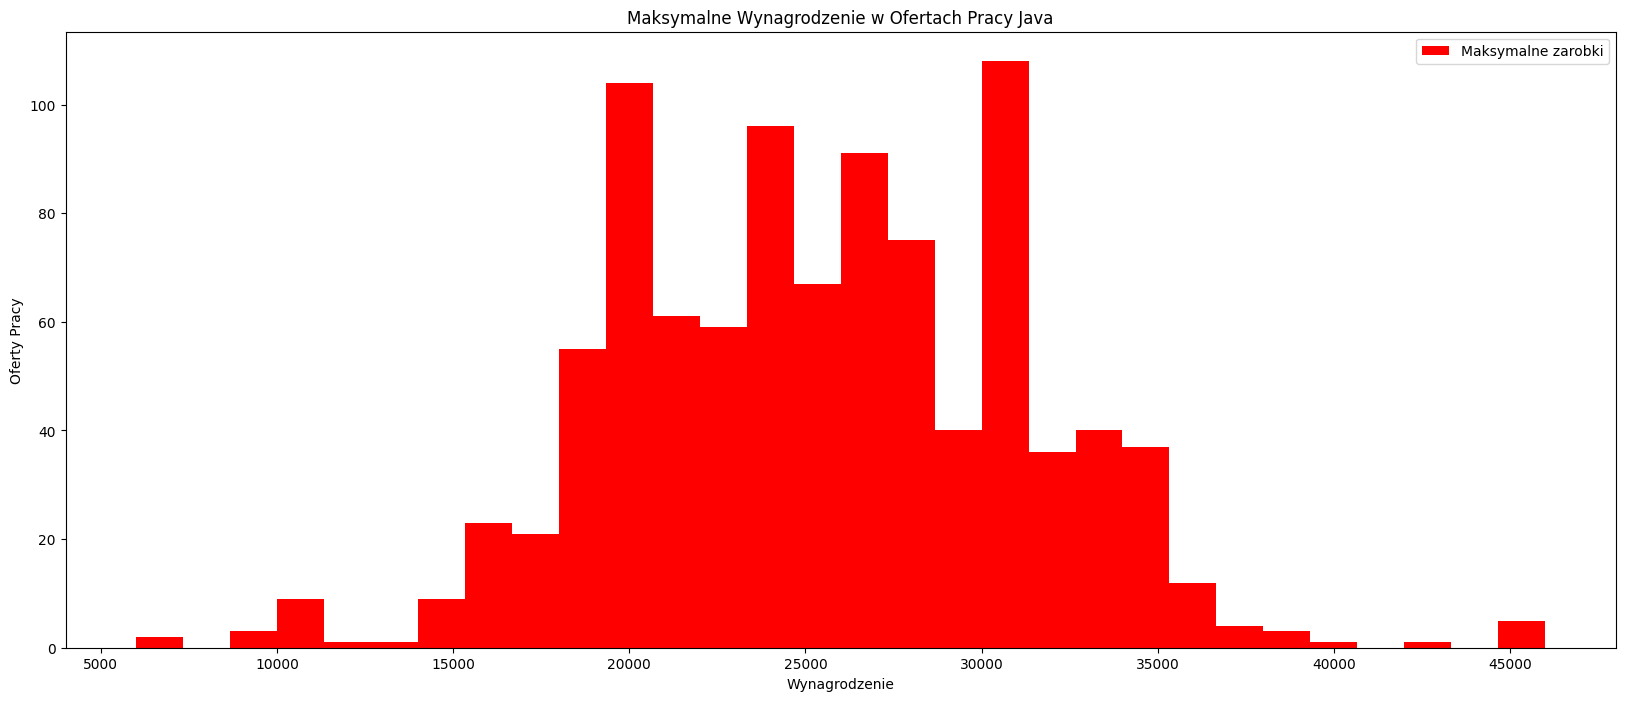

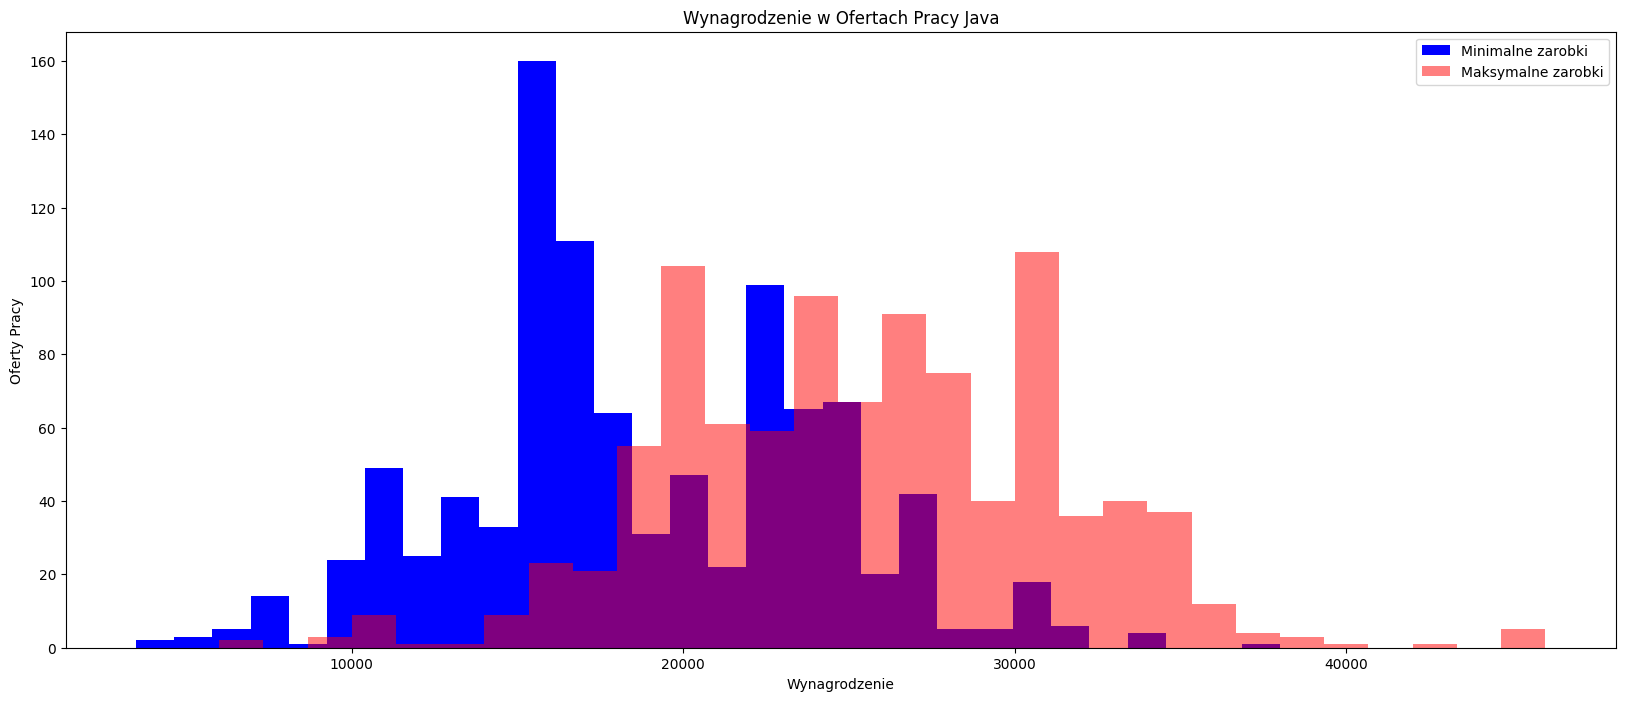

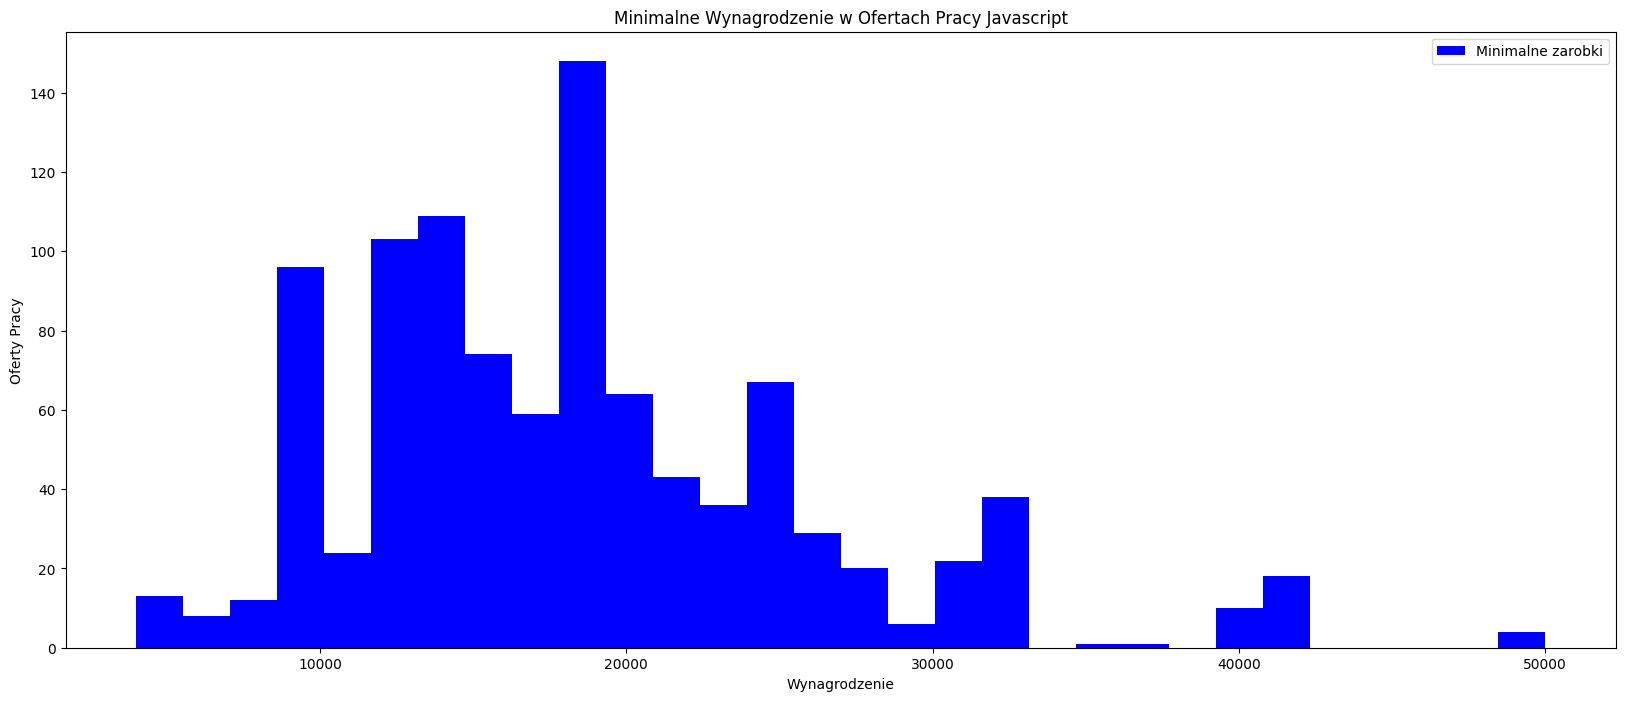

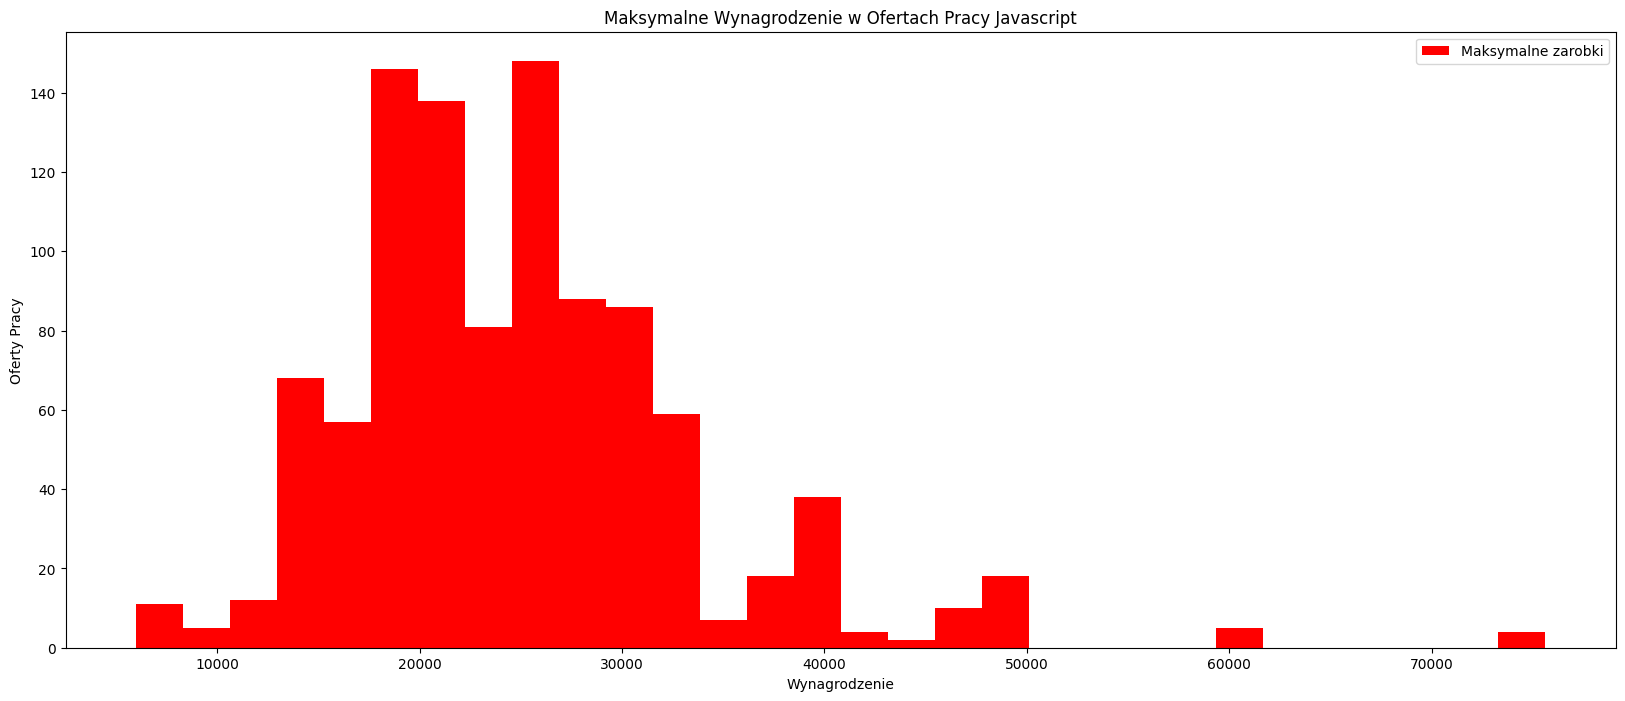

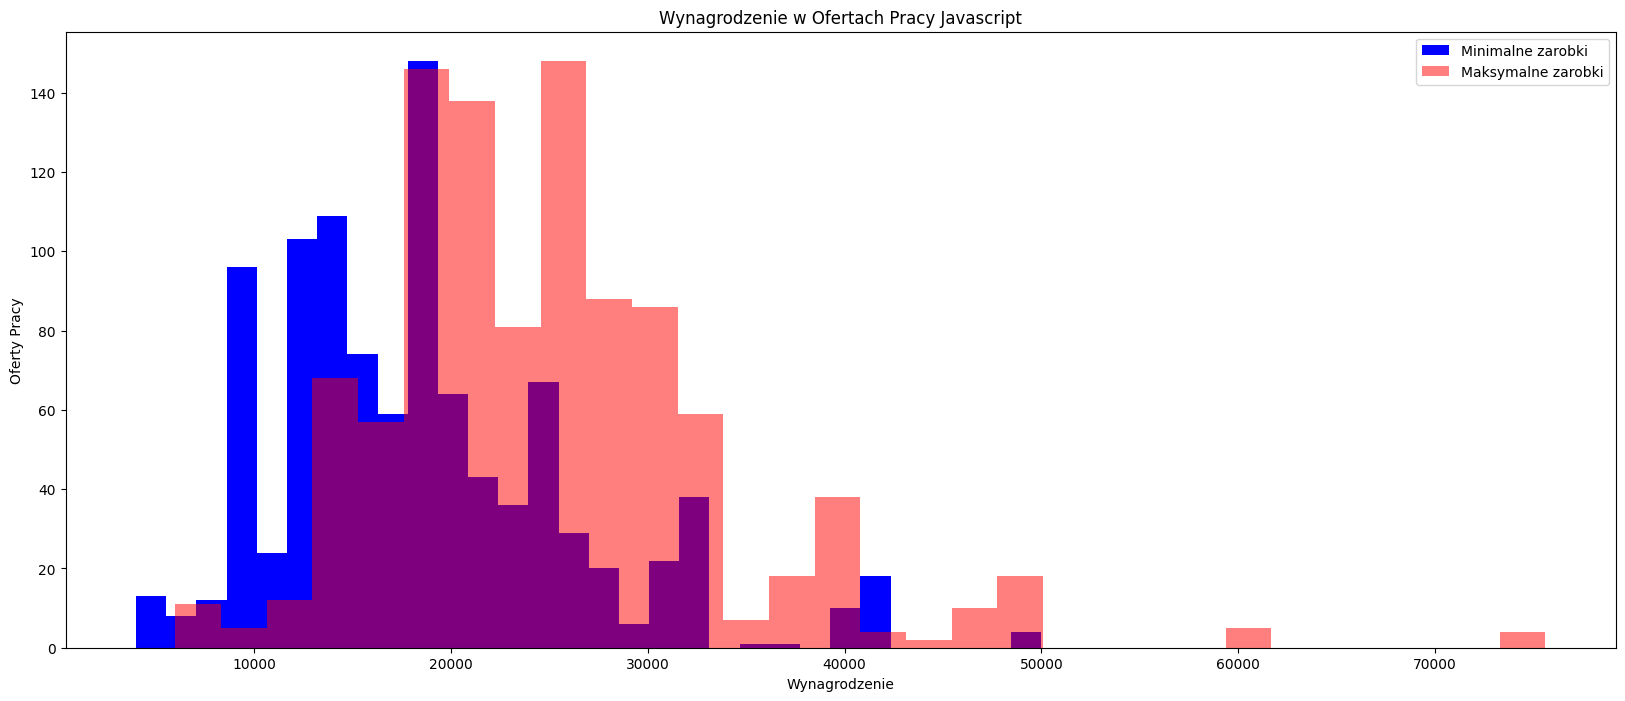

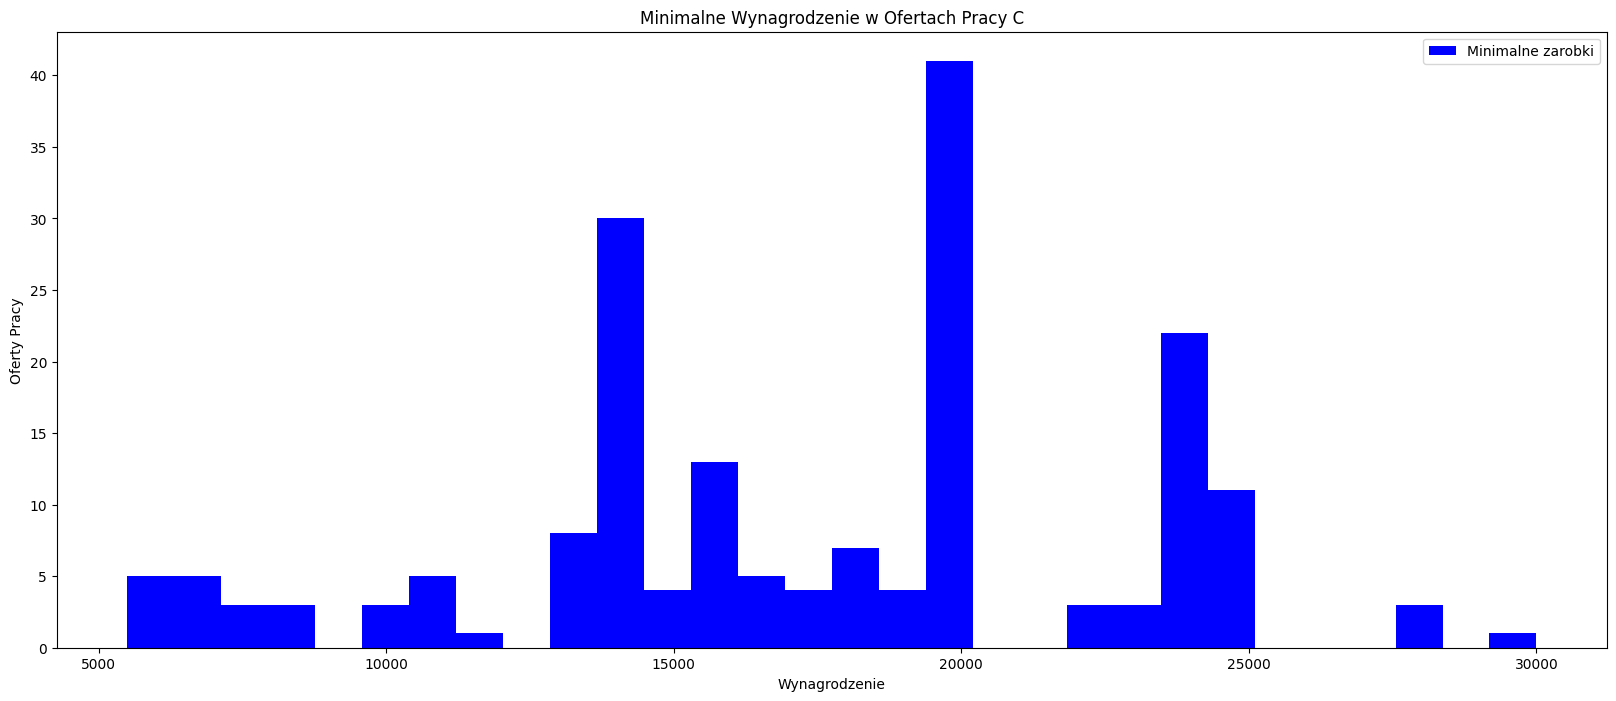

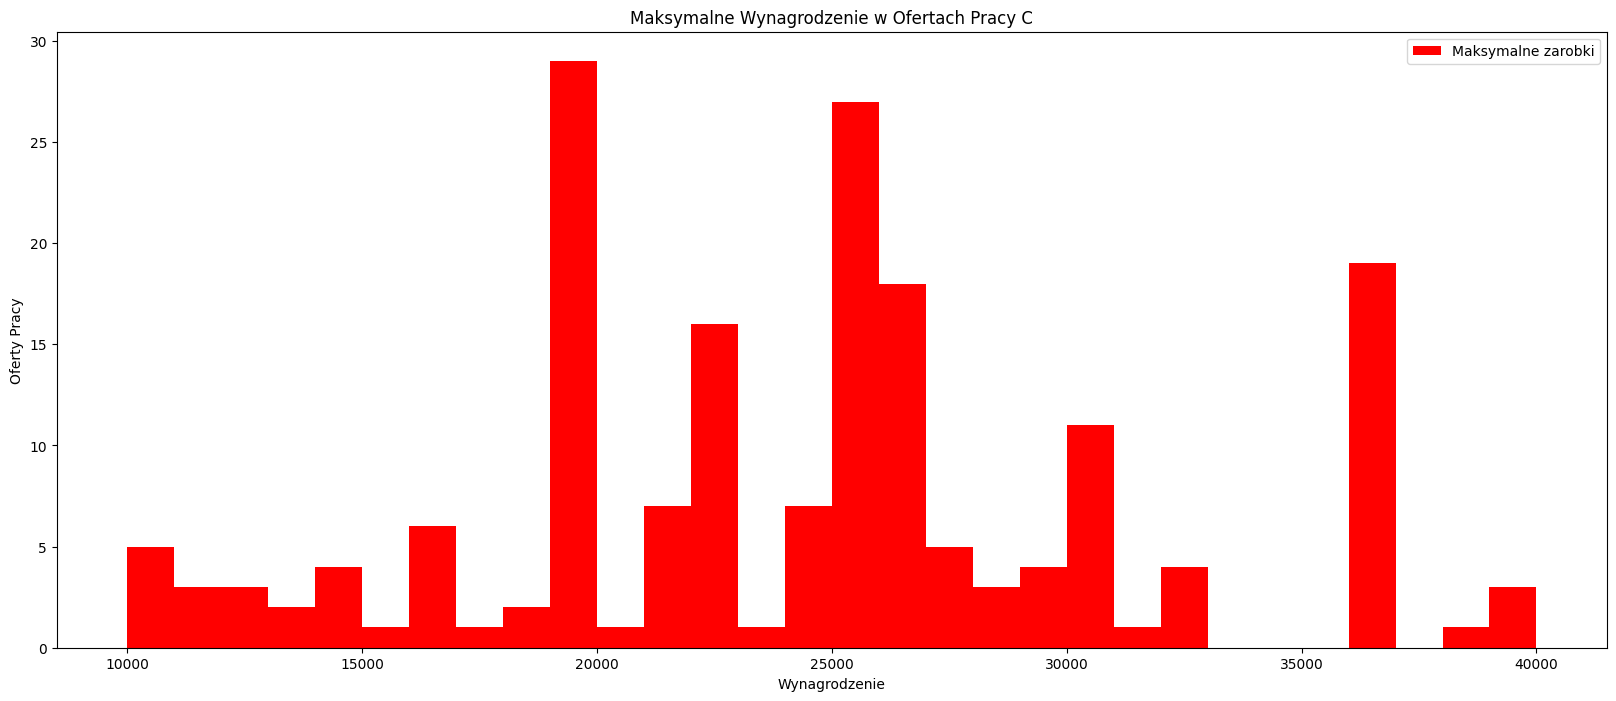

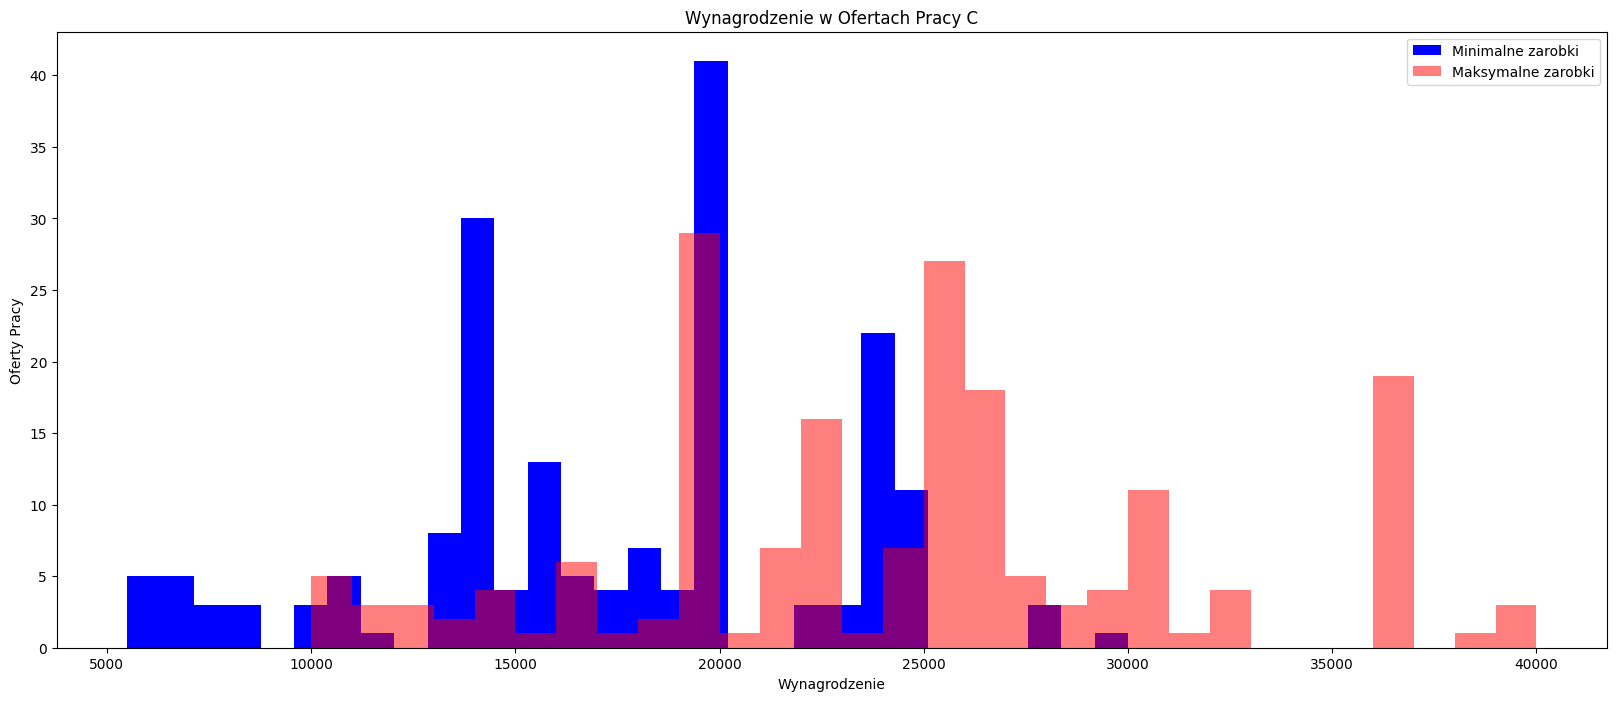

In [ ]:
make_chart("python")
make_chart("java")
make_chart("javascript")
make_chart("c")

# **Wykresy Porównanie**

[4000, 26040.0, 49560, 3500, 23500.0, 46000, 4000, 18500.0, 75600, 5500, 30000.0, 40000]


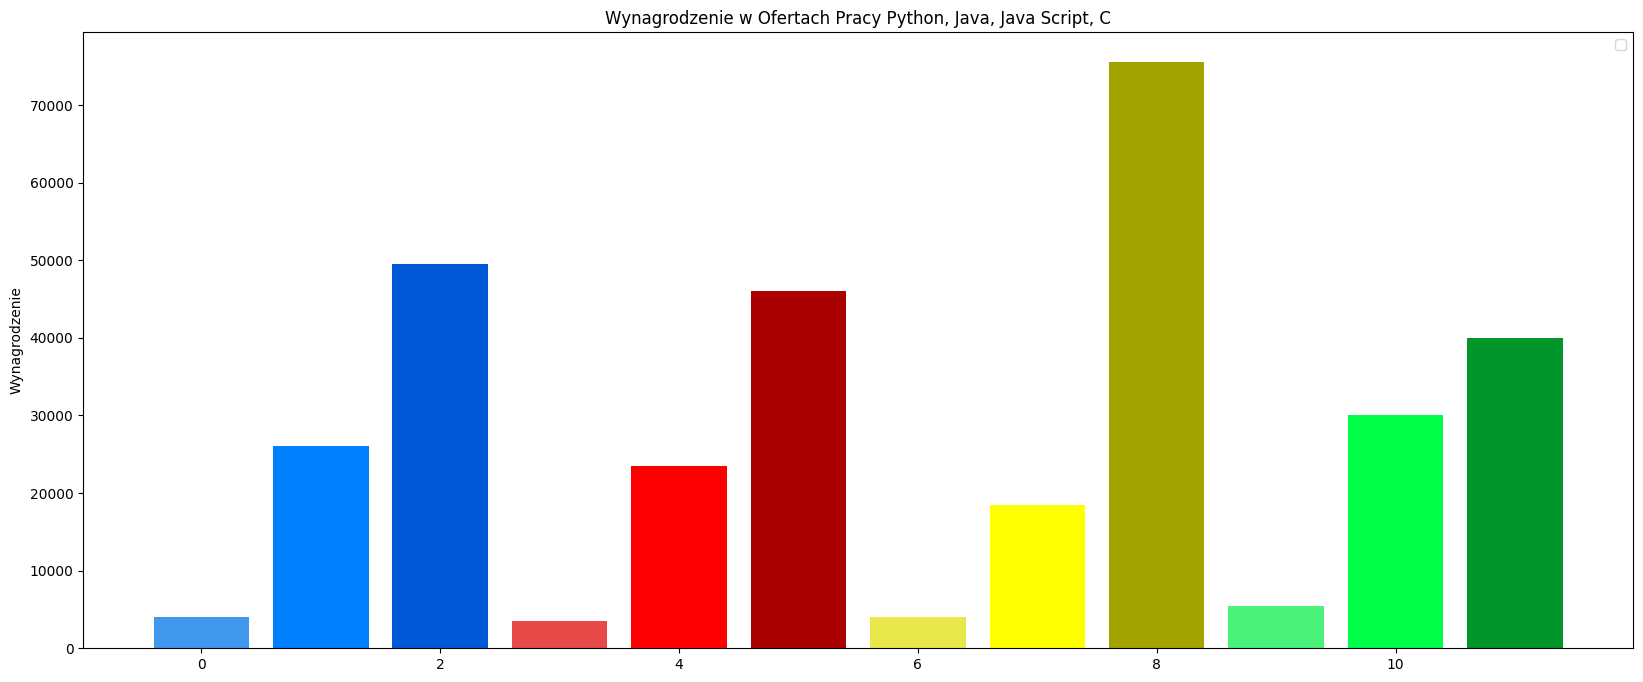

In [ ]:
global list_salary
list_salary = []
list_offers("python")
list_offers("java")
list_offers("javascript")
list_offers("c")
print(list_salary)

colors = ["#4097ed", "#0080ff", "#0059d6", "#e84a4a", "#ff0000", "#ab0000", "#e8e84a", "#ffff00", "#a3a300", "#49f279", "#00ff48", "#00962b"]
plt.figure(figsize=(20, 8))
plt.bar(range(len(list_salary)), list_salary, color=colors)
plt.ylabel("Wynagrodzenie")
plt.title("Wynagrodzenie w Ofertach Pracy Python, Java, Java Script, C")
plt.legend()

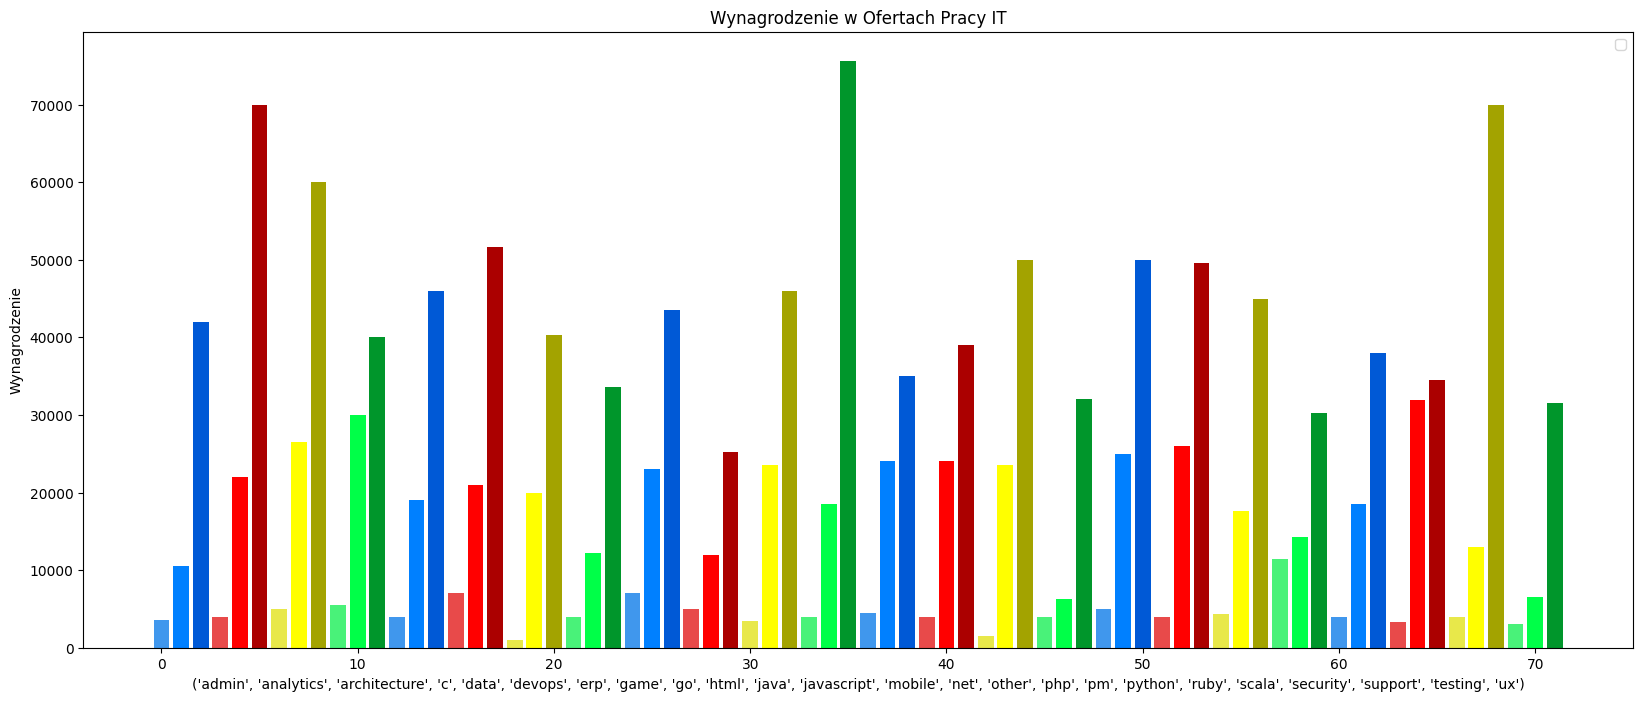

In [ ]:
all_list_offers()